<hr style="height:10px"> 
 
<div class='container2'>
	<h1> Trabalho Aprendizado de Máquina - CSI704</h1>
    <h2>UFOP - DECSI</h2>
    <h4>Alunos: Aline Martins Dias, Daniele Cristina Almeida, Gustavo Estevam Sena</h4>
</div>

<hr style="height:5px"> 

Modificado do original desenvolvido por: <a href="http://lattes.cnpq.br/2532893661927339">Renato Moraes Silva</a> para [2].

<hr style="height:2px"> 

## 1- Introdução
Aprendizado de Máquina é caracterizado pelo desenvolvimento de técnicas que  buscam equipar os softwares para melhorar o seu desempenho adquirindo conhecimento através da experiência, ou seja através do aprendizado indutivo.  [2]

Diante disso,  o aprendizado indutivo é adquirido através da implementação de algoritmos que fazem o processamento da base de dados e  conseguem representar os dados em um modelo sob algum aspecto observado. 

Para conseguir realizar a  visualização dos dados e a sua  interpretação  de como os mesmos estão estão distribuídos, será utilizado recursos da tecnologia  Python, que possui algumas bibliotecas que facilitam o processo de visualização, tais como: `Pandas`, `Matplotlib` e `Seaborn`. Para aprender a usar essas ferramentas, será usada a base de dados Wine [1]. É importante destacar que a base de dados Wine usada neste trabalho foi modificada pelos autores por motivos didáticos. A versão original dela pode ser encontrada no seguinte link: <https://archive.ics.uci.edu/ml/datasets/wine>. 

Diante deste contexto, o presente trabalho  tem como objetivo aplicar a teoria de aprendizagem de máquina usando a versão modificada da  base Wine. Também será apresentado como foi realizado para fazer a eliminação de atributos irrelevantes e o tratamento de valores faltantes. Além disso, será mostrado como tratar valores redundantes ou inconsistentes e como fazer a normalização dos dados. Depois, será feita a detecção e remoção de *outliers* da base dados. Por fim, será mostrado como fazer a análise da distribuição das classes e da correlação entre os atributos.

---
## 2- Recursos Necessários

Para executar este *notebook*, deve ser utilizado o `Python 3.5` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas

Será utilizado também o conjuntos de dados disponibilizado junto com este *notebook*, que se encontra no diretório `datasets`, em formato de arquivo `.csv`.

---
## 3- Carregando os dados

O primeiro passo para executar este notebook, deve-se importar todas as bibliotecas necessárias. Abaixo é possível realizar este procedimento.

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import sklearn

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

#Normalização
from sklearn.preprocessing import StandardScaler

#Split (divisão da base de teste e de treino)
from sklearn.model_selection import train_test_split

#Algoritmo KNN e algoritmo para calculo de vizinhança
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

#Customização e Métricas
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


Em seguida, os dados serão carregados do arquivo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Após realizar o carregamento do arquivo, é necessário importar a base de dados Wine. Se este procedimento não for realizado o código abaixo não será executado.

In [ ]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'wine.csv', sep=',', index_col=None, header=None) 

print('Dados importados com sucesso!')

Dados importados com sucesso!


O próximo passo é setar o nome das Colunas dos Atributos conforme os detalhes disponibilizados no repositório original: https://archive.ics.uci.edu/ml/datasets/wine

In [ ]:
df_dataset.set_axis(['Álcool', 
                     'Ácido Málico', 
                     'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 
                     'Fenóis Totais', 'Flavonoides', 
                     'Fenóis não Flavonóides',
                     'Proantocianidinas',
                     'Intensidade da cor',
                     'Matiz',
                     'Vinhos Diluídos',
                     'Prolina',
                     'Classe de Vinhos'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.set_axis except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


Agora, vamos dar uma olhada nos metadados do dataset e nas 100 primeiras amostras da base de dados.

In [ ]:
# exibe o dataframe
df_dataset.info()
df_dataset.head(n=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Álcool                   178 non-null    float64
 1   Ácido Málico             178 non-null    float64
 2   Cinzas                   178 non-null    float64
 3   Alcalinidade das Cinzas  178 non-null    float64
 4   Magnésio                 178 non-null    int64  
 5   Fenóis Totais            178 non-null    float64
 6   Flavonoides              178 non-null    float64
 7   Fenóis não Flavonóides   178 non-null    float64
 8   Proantocianidinas        178 non-null    float64
 9   Intensidade da cor       178 non-null    float64
 10  Matiz                    178 non-null    float64
 11  Vinhos Diluídos          178 non-null    float64
 12  Prolina                  178 non-null    int64  
 13  Classe de Vinhos         178 non-null    int64  
dtypes: float64(11), int64(3)
m

Álcool  Ácido Málico  Cinzas  Alcalinidade das Cinzas  Magnésio  \
0    14.23          1.71    2.43                     15.6       127   
1    13.20          1.78    2.14                     11.2       100   
2    13.16          2.36    2.67                     18.6       101   
3    14.37          1.95    2.50                     16.8       113   
4    13.24          2.59    2.87                     21.0       118   
..     ...           ...     ...                      ...       ...   
95   12.47          1.52    2.20                     19.0       162   
96   11.81          2.12    2.74                     21.5       134   
97   12.29          1.41    1.98                     16.0        85   
98   12.37          1.07    2.10                     18.5        88   
99   12.29          3.17    2.21                     18.0        88   

    Fenóis Totais  Flavonoides  Fenóis não Flavonóides  Proantocianidinas  \
0            2.80         3.06                    0.28               2.29   
1            2.65         2.76                    0.26               1.28   
2            2.80         3.24                    0.30               2.81   
3            3.85         3.49                    0.24               2.18   
4            2.80         2.69                    0.39               1.82   
..            ...          ...                     ...                ...   
95           2.50         2.27                    0.32               3.28   
96           1.60         0.99                    0.14               1.56   
97           2.55         2.50                    0.29               1.77   
98           3.52         3.75                    0.24               1.95   
99           2.85         2.99                    0.45               2.81   

    Intensidade da cor  Matiz  Vinhos Diluídos  Prolina  Classe de Vinhos  
0                 5.64   1.04             3.92     1065                 1  
1                 4.38   1.05             3.40     1050                 1  
2                 5.68   1.03             3.17     1185                 1  
3                 7.80   0.86             3.45     1480                 1  
4                 4.32   1.04             2.93      735                 1  
..                 ...    ...              ...      ...               ...  
95                2.60   1.16             2.63      937                 2  
96                2.50   0.95             2.26      625                 2  
97                2.90   1.23             2.74      428                 2  
98                4.50   1.04             2.77      660                 2  
99                2.30   1.42             2.83      406                 2  

[100 rows x 14 columns]

A base de dados contém amostras de vinhos (linhas) representadas pelos seguintes atributos (colunas): 'Álcool', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonóides', 'Proantocianidinas', 'Intensidade da cor', 'Matiz', 'Vinhos Diluídos', 'Prolina', 'Classe de Vinhos' 	

Obs: Vinhos Diluídos: DO280/OD315


## 4- Pré-processamento: eliminação de atributos irrelevantes

Em uma tarefa de aprendizado de máquina devemos remover atributos irrelevantes para a classificação. Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes. Nesse caso não identificamos atributos irrelevantes, então deixamos todos os 13.


In [ ]:
# remove a coluna que tenha algum atributo irrelevante
# não tem nenhum atributo irrelevante
#df_dataset = df_dataset.drop(columns=['']) 

# imprime o dataframe
display(df_dataset.head(n=100))

Álcool  Ácido Málico  Cinzas  Alcalinidade das Cinzas  Magnésio  \
0    14.23          1.71    2.43                     15.6       127   
1    13.20          1.78    2.14                     11.2       100   
2    13.16          2.36    2.67                     18.6       101   
3    14.37          1.95    2.50                     16.8       113   
4    13.24          2.59    2.87                     21.0       118   
..     ...           ...     ...                      ...       ...   
95   12.47          1.52    2.20                     19.0       162   
96   11.81          2.12    2.74                     21.5       134   
97   12.29          1.41    1.98                     16.0        85   
98   12.37          1.07    2.10                     18.5        88   
99   12.29          3.17    2.21                     18.0        88   

    Fenóis Totais  Flavonoides  Fenóis não Flavonóides  Proantocianidinas  \
0            2.80         3.06                    0.28               2.29   
1            2.65         2.76                    0.26               1.28   
2            2.80         3.24                    0.30               2.81   
3            3.85         3.49                    0.24               2.18   
4            2.80         2.69                    0.39               1.82   
..            ...          ...                     ...                ...   
95           2.50         2.27                    0.32               3.28   
96           1.60         0.99                    0.14               1.56   
97           2.55         2.50                    0.29               1.77   
98           3.52         3.75                    0.24               1.95   
99           2.85         2.99                    0.45               2.81   

    Intensidade da cor  Matiz  Vinhos Diluídos  Prolina  Classe de Vinhos  
0                 5.64   1.04             3.92     1065                 1  
1                 4.38   1.05             3.40     1050                 1  
2                 5.68   1.03             3.17     1185                 1  
3                 7.80   0.86             3.45     1480                 1  
4                 4.32   1.04             2.93      735                 1  
..                 ...    ...              ...      ...               ...  
95                2.60   1.16             2.63      937                 2  
96                2.50   0.95             2.26      625                 2  
97                2.90   1.23             2.74      428                 2  
98                4.50   1.04             2.77      660                 2  
99                2.30   1.42             2.83      406                 2  

[100 rows x 14 columns]

## 5- Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados:

Para o dataset wine.csv não foram encontrados valores Not a Number, portanto não apresenta atributos com valores ausentes.


In [ ]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df_dataset.iloc[idxRowNan])

Empty DataFrame
Columns: [Álcool, Ácido Málico, Cinzas, Alcalinidade das Cinzas, Magnésio, Fenóis Totais, Flavonoides, Fenóis não Flavonóides, Proantocianidinas, Intensidade da cor, Matiz, Vinhos Diluídos, Prolina, Classe de Vinhos]
Index: []


Caso existisse atributos com valores faltantes seria necessário corrigir esses valores fazendo o cáculo da média dos valores conhecidos da respectiva classe. Abaixo é apresentado uma forma para corrigir esta situação.

In [ ]:
# def trataFaltantes( df_dataset ):

#    Substitui os valores faltantes pela média dos outros valores do mesmo atributo
#    de amostras que sejam da mesma classe    
    
    # seleciona apenas as linhas da base de dados onde a coluna largura_sepala não contém valores nulos
    # notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['']), :]
    # notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['']), :]

    # calcula a media dos valores do atributo largura_sepala que não são nulos e que são da classe Iris-setosa 
    # media_ls = notNull_ls[ notNull_ls['classe']=='' ][''].mean()
    # media_cp = notNull_cp[ notNull_cp['classe']=='' ][''].mean()

    # substitui os valores nulos pela média 
    # df_dataset.loc[ pd.isnull(df_dataset['']), ''] = media_ls
    # df_dataset.loc[ pd.isnull(df_dataset['']), ''] = media_cp
    
    # return df_dataset

# trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuiam valores NaN
# print('\nAmostras que possuiam valores faltantes:')
# display(df_dataset.iloc[idxRowNan])

## 6- Pré-processamento: tratamento de dados inconsistentes ou redundantes

Outro passo importante, é verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há amostras representadas por atributos com todos os valores iguais, mas com classes diferentes. A redundância é dada pela repetição de linhas na base de dados.

A seguir, vamos verificar se existem amostras duplicadas (redundantes) e inconsistentes.

In [ ]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Álcool', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonóides', 'Proantocianidinas', 'Intensidade da cor', 'Matiz', 'Vinhos Diluídos', 'Prolina'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


No caso da wine dataset não existem amostras duplicadas.

 Caso existesse amostra duplicadas, o procedimento que seria executado era:

1) Remover as amostras redundantes, mantendo na base apenas uma delas.

In [ ]:
# def delDuplicatas( df_dataset ):
    # Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    
    
    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    # df_dataset = df_dataset.drop_duplicates(keep = 'first')    

    # return df_dataset

# df_dataset = delDuplicatas( df_dataset )


Após remover as amostras redundantes, é preciso checar se há amostras inconsistentes.  Na base de dados em estudo não houve amostras redudantes, por isso o código abaixo não precisa ser executado.

In [ ]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores 
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
# df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Álcool', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonóides', 'Proantocianidinas', 'Intensidade da cor', 'Matiz', 'Vinhos Diluídos', 'Prolina'],keep=False)] 

# se tiver valores inconsistentes, imprime 
# if len(df_duplicates)>0:
   # print('\nAmostras inconsistentes:')
   # display(df_duplicates)
# else:
   # print('Não existem mostras inconsistentes')
    

Caso existe amostras incosistentes seria necessário fazer a exclusão das mesmas, por isso o código abaixo está comentado.

In [ ]:
# def delInconsistencias( df_dataset ):
    # Remove todas as amostras inconsistentes da base de dados
    
    # df_dataset = df_dataset.drop_duplicates(subset=['Álcool', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonóides', 'Proantocianidinas', 'Intensidade da cor', 'Matiz', 'Vinhos Diluídos', 'Prolina'], keep = False)    
  
    # return df_dataset

# df_dataset = delInconsistencias( df_dataset )

# obtém apenas as amostras onde os valores dos atributos estão duplicados
# df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Álcool', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonóides', 'Proantocianidinas', 'Intensidade da cor', 'Matiz', 'Vinhos Diluídos', 'Prolina'],keep=False)] 

# se tiver valores redundantes ou inconsistentes, imprime 
# if len(df_duplicates)>0:
    # display(df_duplicates)
# else:
    # print('Não existem amostras redundantes ou inconsistentes')
    

# 7- Algumas estatísticas sobre a base de dados. 

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um *data frame*, como:

1) Count (Contagem de Valores): 178 Amostras por Variável
2) Mean: Média da Variável
3) std: Devio padrão da Variável
4) min: O valor mínimo presente na Variável
5) 25%, 50%, 75%: Os quartis da distribuição da Variável
6) max: O valor máximo presente na Variável

In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes)


Álcool  Ácido Málico      Cinzas  Alcalinidade das Cinzas  \
count  178.000000    178.000000  178.000000               178.000000   
mean    13.000618      2.336348    2.366517                19.494944   
std      0.811827      1.117146    0.274344                 3.339564   
min     11.030000      0.740000    1.360000                10.600000   
25%     12.362500      1.602500    2.210000                17.200000   
50%     13.050000      1.865000    2.360000                19.500000   
75%     13.677500      3.082500    2.557500                21.500000   
max     14.830000      5.800000    3.230000                30.000000   

         Magnésio  Fenóis Totais  Flavonoides  Fenóis não Flavonóides  \
count  178.000000     178.000000   178.000000              178.000000   
mean    99.741573       2.295112     2.029270                0.361854   
std     14.282484       0.625851     0.998859                0.124453   
min     70.000000       0.980000     0.340000                0.130000   
25%     88.000000       1.742500     1.205000                0.270000   
50%     98.000000       2.355000     2.135000                0.340000   
75%    107.000000       2.800000     2.875000                0.437500   
max    162.000000       3.880000     5.080000                0.660000   

       Proantocianidinas  Intensidade da cor       Matiz  Vinhos Diluídos  \
count         178.000000          178.000000  178.000000       178.000000   
mean            1.590899            5.058090    0.957449         2.611685   
std             0.572359            2.318286    0.228572         0.709990   
min             0.410000            1.280000    0.480000         1.270000   
25%             1.250000            3.220000    0.782500         1.937500   
50%             1.555000            4.690000    0.965000         2.780000   
75%             1.950000            6.200000    1.120000         3.170000   
max             3.580000           13.000000    1.710000         4.000000   

           Prolina  Classe de Vinhos  
count   178.000000        178.000000  
mean    746.893258          1.938202  
std     314.907474          0.775035  
min     278.000000          1.000000  
25%     500.500000          1.000000  
50%     673.500000          2.000000  
75%     985.000000          3.000000  
max    1680.000000          3.000000

## 8- Pré-processamento: normalização dos atributos 

Podemos notar que a média dos atributos Alcool, Alcalinidade das Cinzas, Magnésio e Prolina são muito maiores que a dos outros atributos, assim sendo
precisamos realizar a normalização para essas variávels com escala maior, do contrário haveria um grande impacto para o cálculo da distância nas váriaveis de escala pequena, compromentendo a qualidade de execução do KNN, uma vez que este estima a classe baseando nas distâncias entre as observações mais próximas, 

**Normalização com criação da Função de Normalizar - Vide - Trabalho Orignalt**

In [ ]:
def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
     
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma
        
    
    return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df_dataset.iloc[:,0:-1].values

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df_dataset.iloc[:,0:-1] = X_norm


print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))



Primeira amostra da base antes da normalização: [14.2300 1.7100].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].

Primeira amostra da base apos normalização: [1.5143 -0.5607].


Agora que os dados estão normalizados, analisa-se as informações estatísticas novamente.

In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()
display(df_detalhes.round(8))

Álcool  Ácido Málico      Cinzas  Alcalinidade das Cinzas  \
count  178.000000    178.000000  178.000000               178.000000   
mean    -0.000000      0.000000   -0.000000                -0.000000   
std      1.000000      1.000000    1.000000                 1.000000   
min     -2.427388     -1.428952   -3.668813                -2.663505   
25%     -0.786027     -0.656896   -0.570513                -0.687199   
50%      0.060828     -0.421922   -0.023754                 0.001514   
75%      0.833777      0.667909    0.696145                 0.600395   
max      2.253415      3.100446    3.147447                 3.145637   

         Magnésio  Fenóis Totais  Flavonoides  Fenóis não Flavonóides  \
count  178.000000     178.000000   178.000000              178.000000   
mean    -0.000000       0.000000    -0.000000                0.000000   
std      1.000000       1.000000     1.000000                1.000000   
min     -2.082381      -2.101318    -1.691200               -1.862979   
25%     -0.822096      -0.882977    -0.825211               -0.738059   
50%     -0.121938       0.095690     0.105851               -0.175599   
75%      0.508205       0.806722     0.846697                0.607827   
max      4.359076       2.532372     3.054216                2.395645   

       Proantocianidinas  Intensidade da cor       Matiz  Vinhos Diluídos  \
count         178.000000          178.000000  178.000000       178.000000   
mean           -0.000000            0.000000    0.000000         0.000000   
std             1.000000            1.000000    1.000000         1.000000   
min            -2.063214           -1.629691   -2.088840        -1.889723   
25%            -0.595603           -0.792866   -0.765403        -0.949570   
50%            -0.062721           -0.158777    0.033034         0.237066   
75%             0.627406            0.492567    0.711158         0.786369   
max             3.475269            3.425768    3.292407         1.955399   

          Prolina  Classe de Vinhos  
count  178.000000        178.000000  
mean    -0.000000          1.938202  
std      1.000000          0.775035  
min     -1.488987          1.000000  
25%     -0.782431          1.000000  
50%     -0.233063          2.000000  
75%      0.756117          3.000000  
max      2.963114          3.000000

**Compararamos o método de normalização def_normalizar(x) com o método padrão de normalização em python: sklearn.preprocessing.StandardScaler para garantir que a normalização foi feita de forma correta**

Invoca o método padrão para normalização da Biblioteca scikit-learn

In [ ]:
scaler = StandardScaler()

Configura o escalador para considerar apenas as colunas desejadas. Retirar da escala a  classe do dataframe ('Classificacacao')

In [ ]:
scaler.fit(df_dataset.drop(['Classe de Vinhos'], axis=1))

StandardScaler()

In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()
display(df_detalhes.round(8))

Álcool  Ácido Málico      Cinzas  Alcalinidade das Cinzas  \
count  178.000000    178.000000  178.000000               178.000000   
mean    -0.000000      0.000000   -0.000000                -0.000000   
std      1.000000      1.000000    1.000000                 1.000000   
min     -2.427388     -1.428952   -3.668813                -2.663505   
25%     -0.786027     -0.656896   -0.570513                -0.687199   
50%      0.060828     -0.421922   -0.023754                 0.001514   
75%      0.833777      0.667909    0.696145                 0.600395   
max      2.253415      3.100446    3.147447                 3.145637   

         Magnésio  Fenóis Totais  Flavonoides  Fenóis não Flavonóides  \
count  178.000000     178.000000   178.000000              178.000000   
mean    -0.000000       0.000000    -0.000000                0.000000   
std      1.000000       1.000000     1.000000                1.000000   
min     -2.082381      -2.101318    -1.691200               -1.862979   
25%     -0.822096      -0.882977    -0.825211               -0.738059   
50%     -0.121938       0.095690     0.105851               -0.175599   
75%      0.508205       0.806722     0.846697                0.607827   
max      4.359076       2.532372     3.054216                2.395645   

       Proantocianidinas  Intensidade da cor       Matiz  Vinhos Diluídos  \
count         178.000000          178.000000  178.000000       178.000000   
mean           -0.000000            0.000000    0.000000         0.000000   
std             1.000000            1.000000    1.000000         1.000000   
min            -2.063214           -1.629691   -2.088840        -1.889723   
25%            -0.595603           -0.792866   -0.765403        -0.949570   
50%            -0.062721           -0.158777    0.033034         0.237066   
75%             0.627406            0.492567    0.711158         0.786369   
max             3.475269            3.425768    3.292407         1.955399   

          Prolina  Classe de Vinhos  
count  178.000000        178.000000  
mean    -0.000000          1.938202  
std      1.000000          0.775035  
min     -1.488987          1.000000  
25%     -0.782431          1.000000  
50%     -0.233063          2.000000  
75%      0.756117          3.000000  
max      2.963114          3.000000

Pode-se ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1. 

## 9- Pré-processamento: detecção de *outliers* 

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

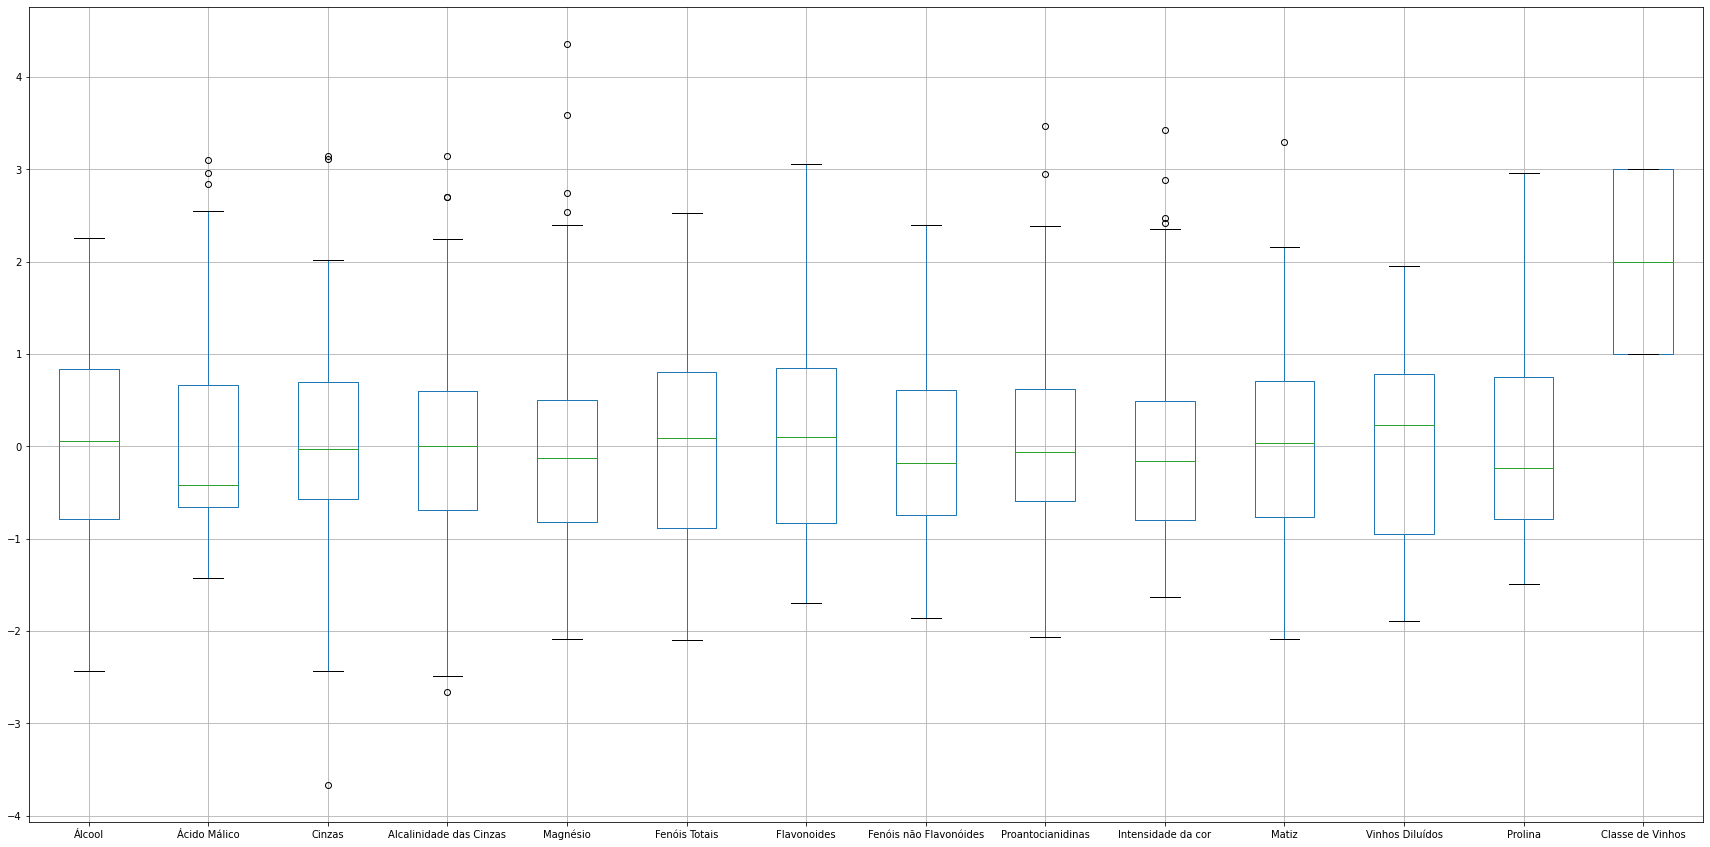

In [ ]:
# gera um bloxplot para cada atributo
df_dataset.boxplot(figsize=(30,15))
plt.show()

Verificar que os atributos Ácido Málico, Cinzas, Alcalinidade das Cinzas, Magnésio, Proantocianidinas, Intensidade da Cor, Matiz possuem outliers e podem prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de amostras com valores de atributos incorretos. Verificar

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Pode-se plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função `scatter_matrix` da `Pandas`.

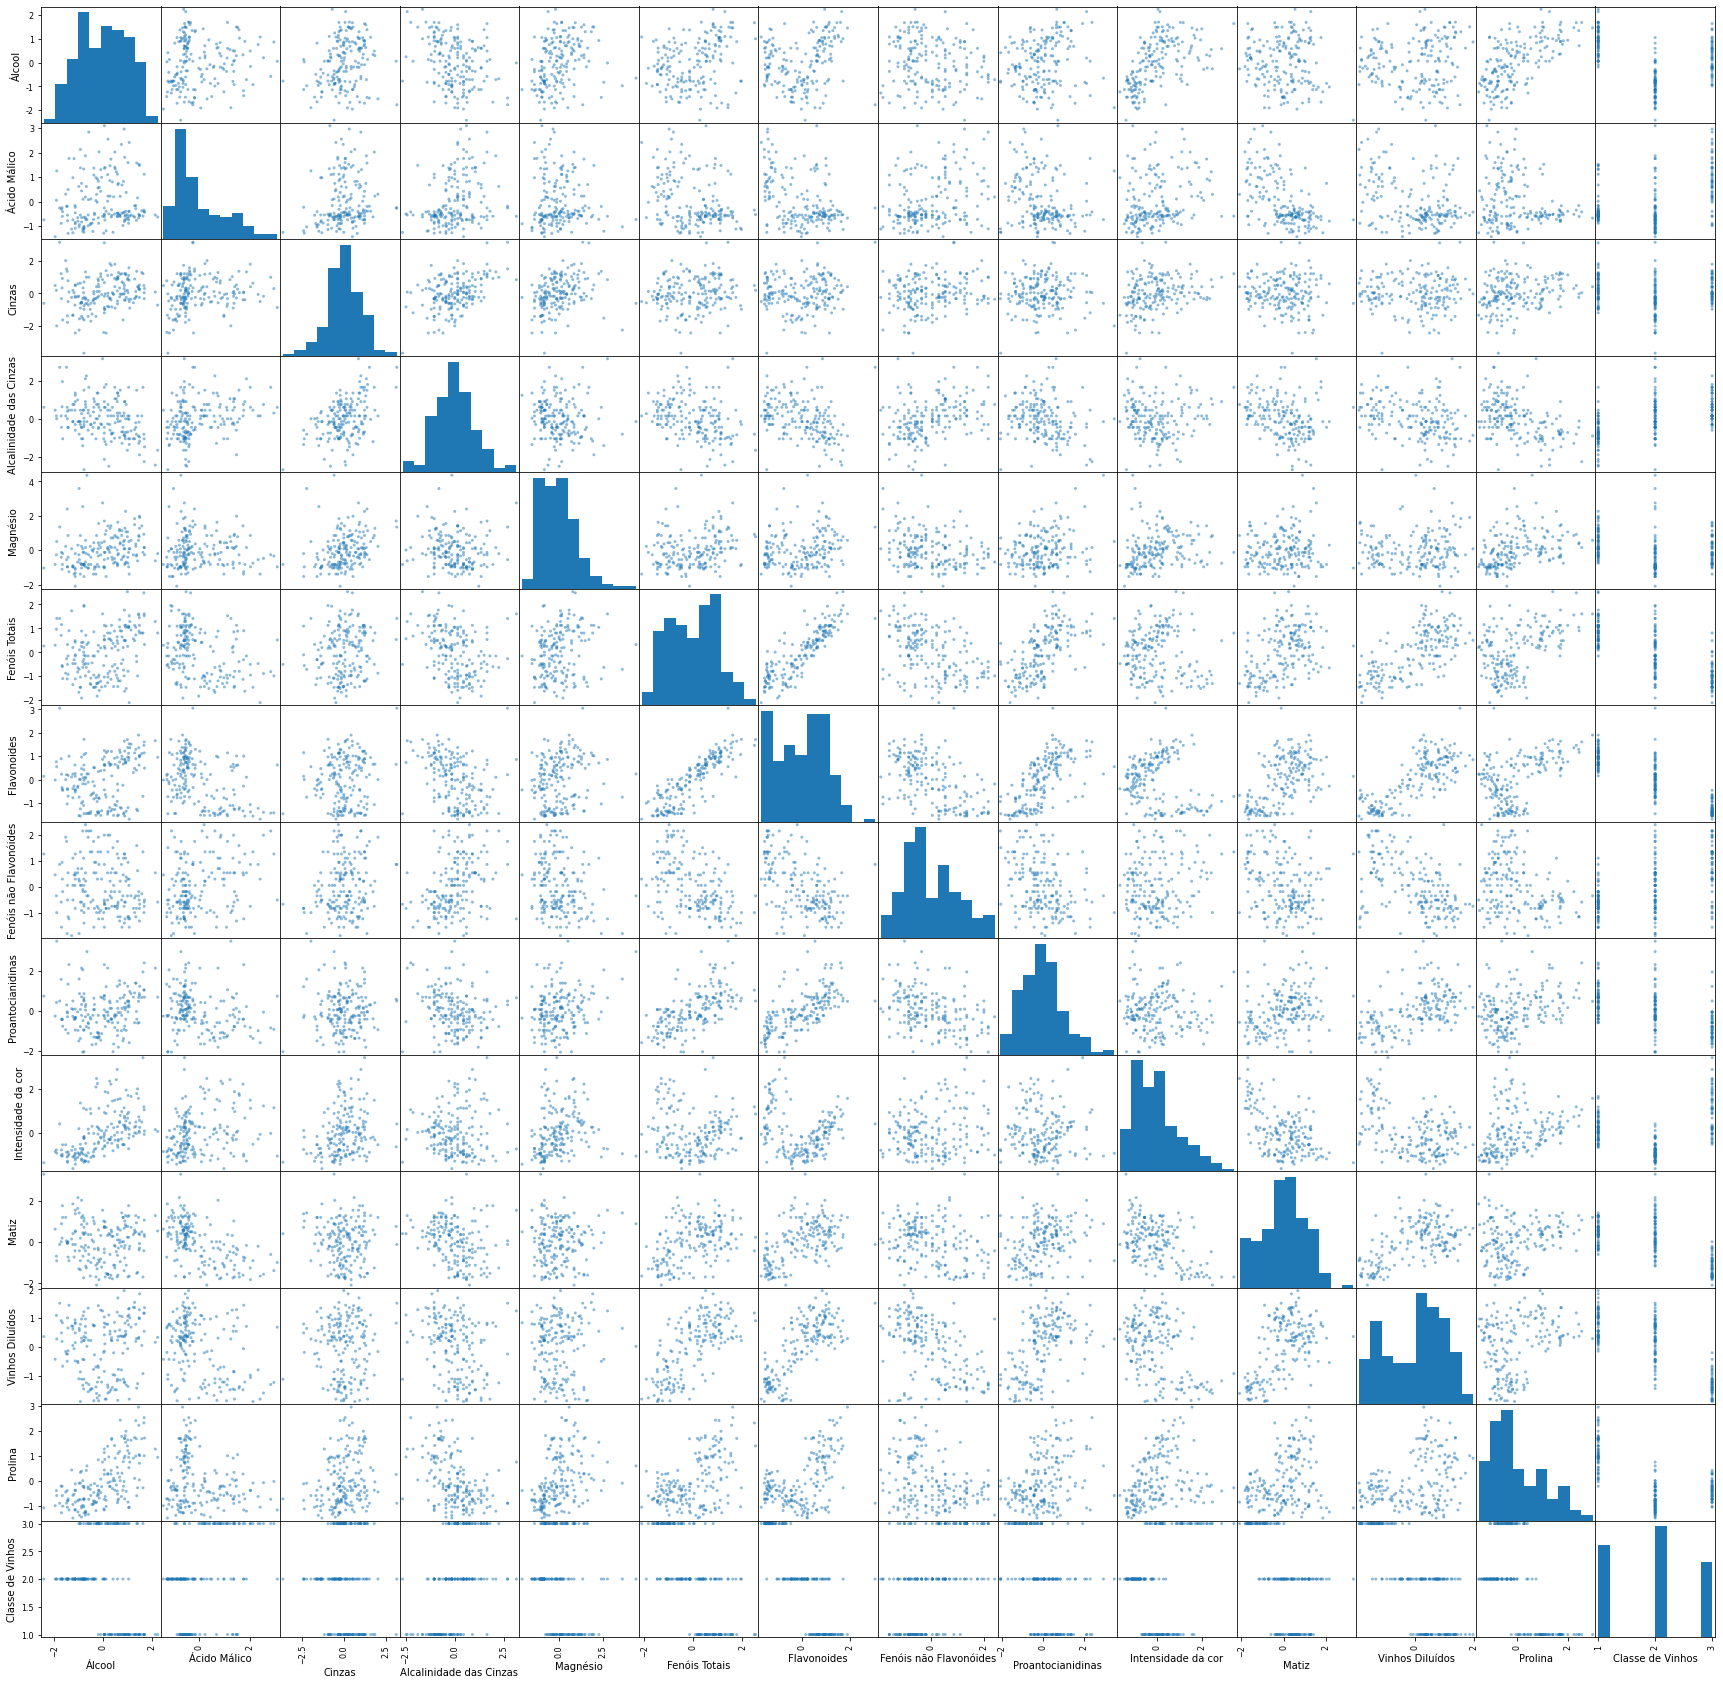

In [ ]:
pd.plotting.scatter_matrix(df_dataset, figsize=(30,30))

plt.show()

Outra forma de plotar gráficos de dispersão a partir dos _dataframes_ é usando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos. 

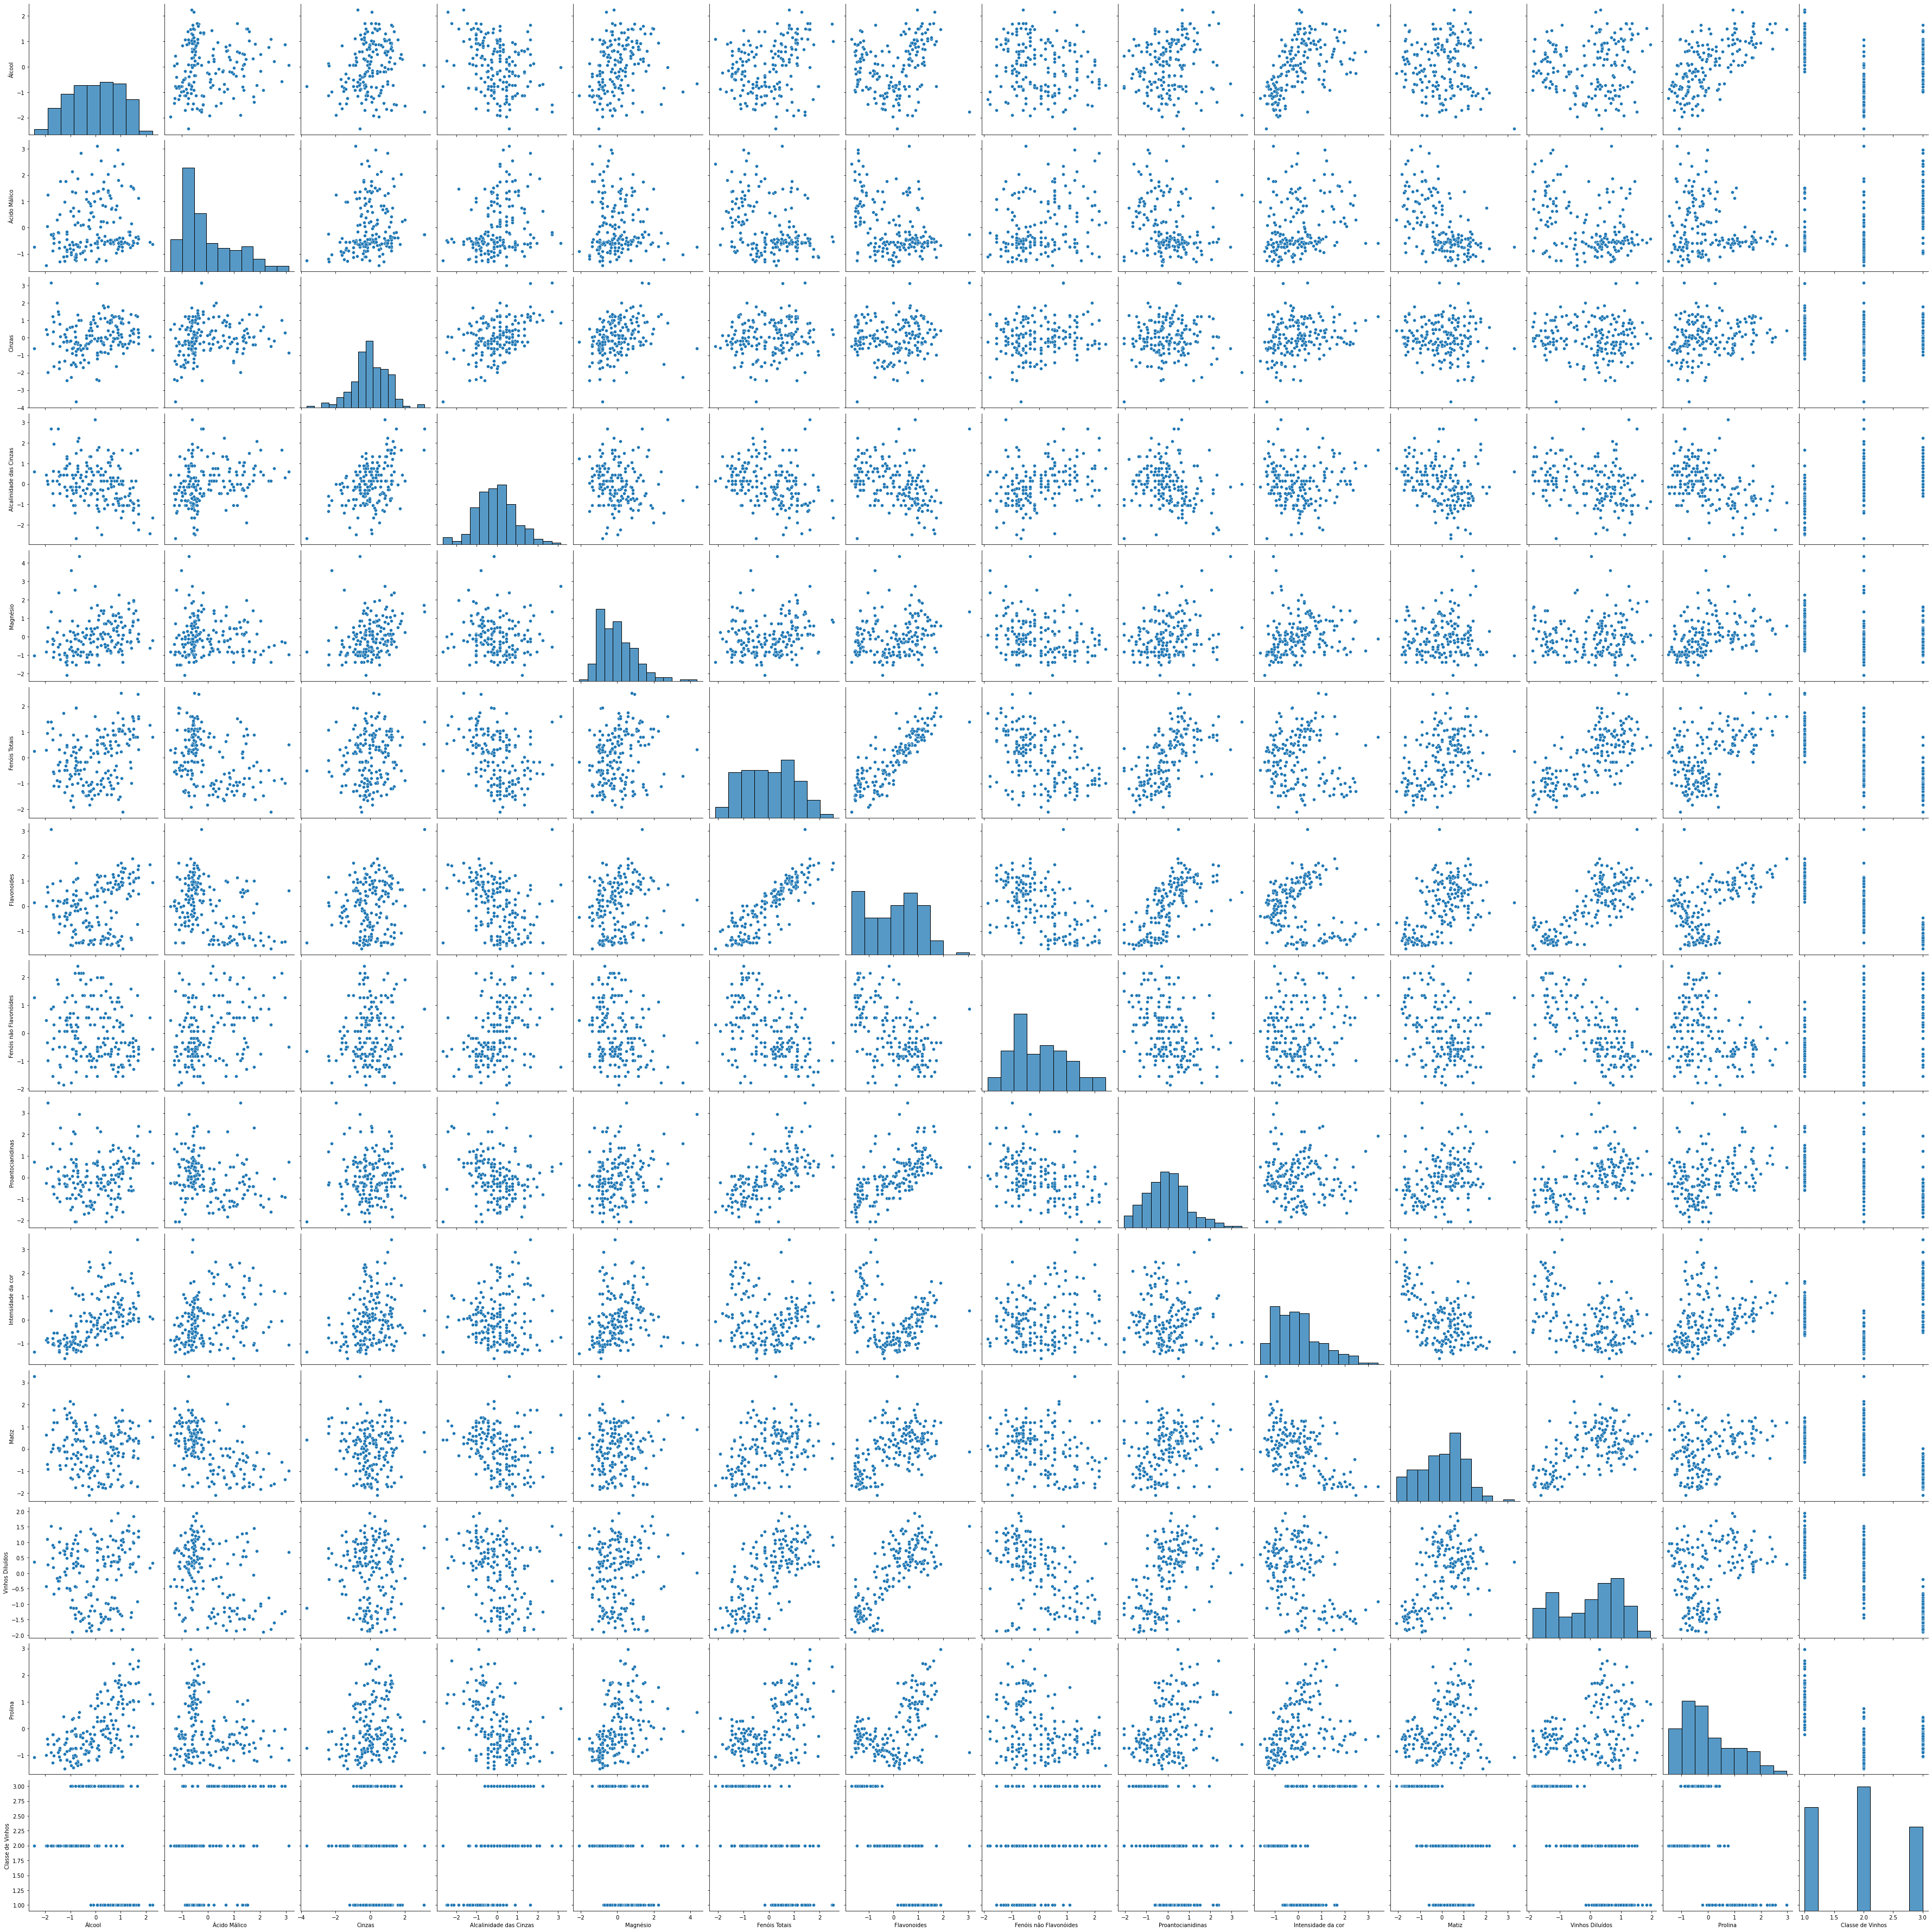

In [ ]:
# matriz de gráficos scatter 
sns.pairplot(df_dataset,  height=3.6);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

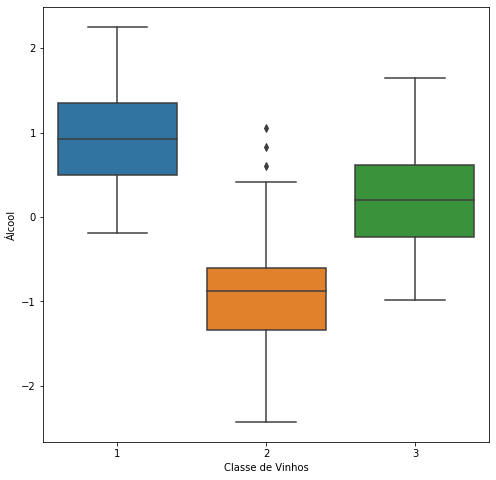

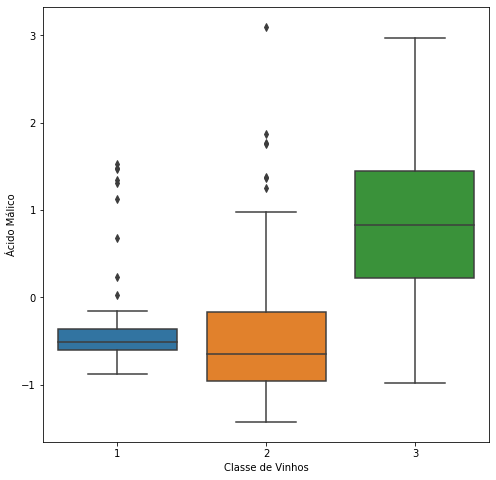

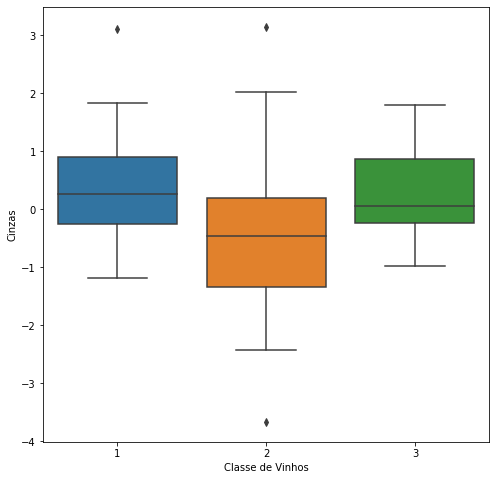

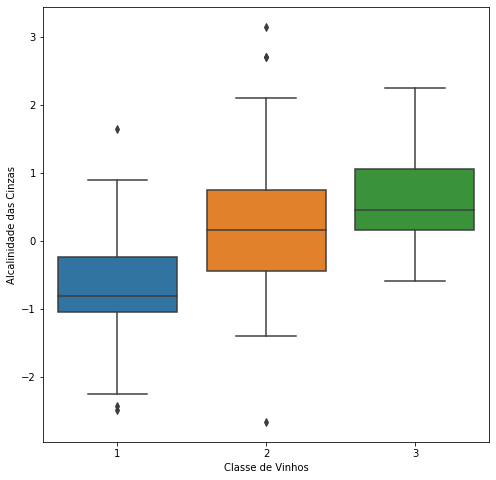

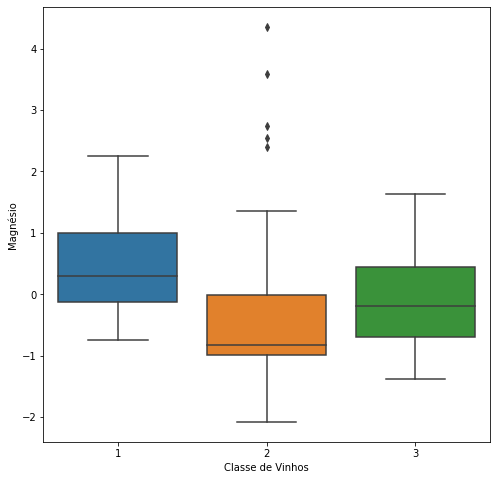

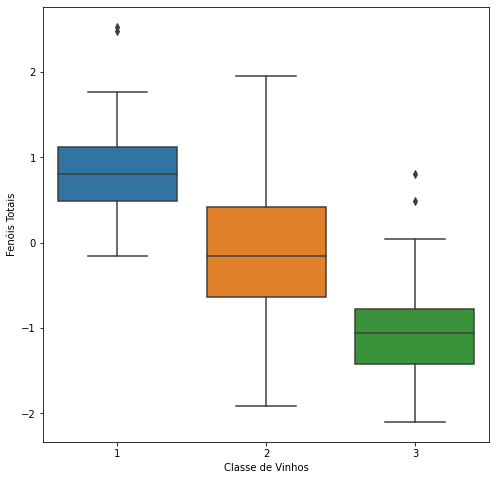

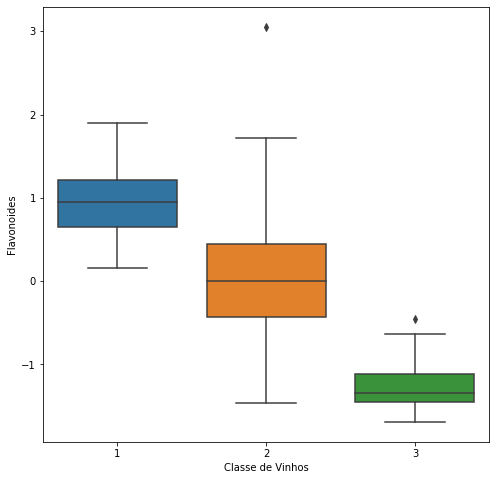

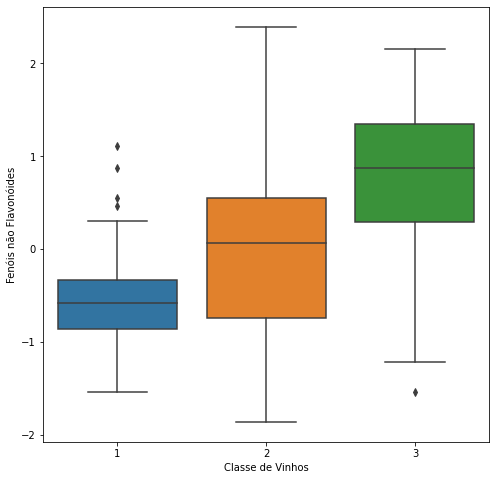

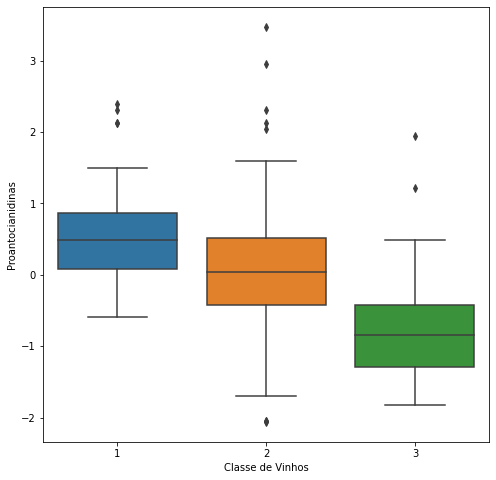

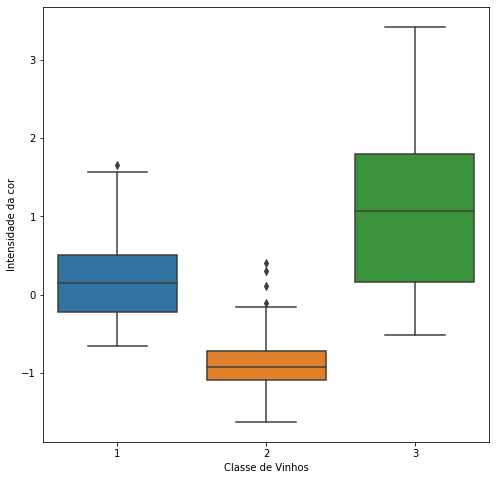

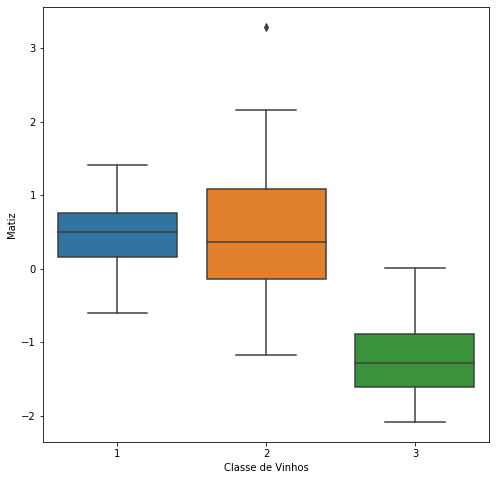

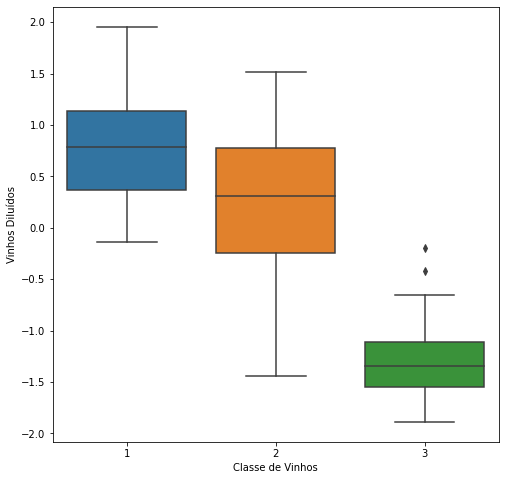

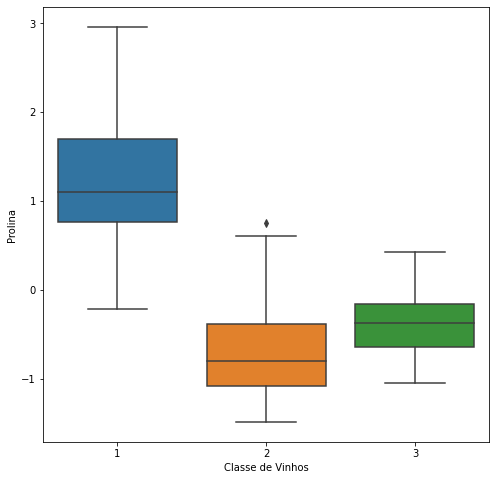

In [ ]:
for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))

    # cria o boxplot
    sns.boxplot(x="Classe de Vinhos", y=atributo, data=df_dataset, whis=1.5)

    # mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, será usado para analisar cada atributo.

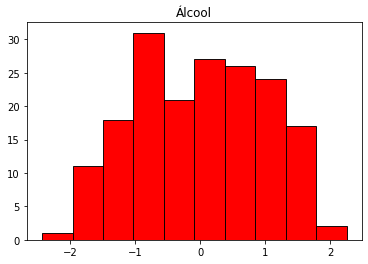

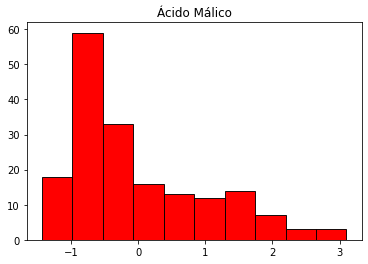

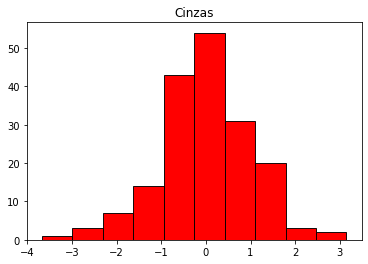

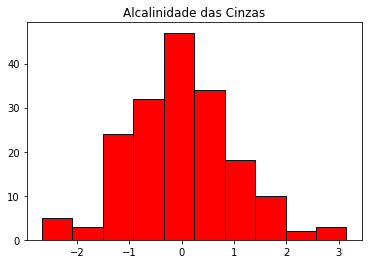

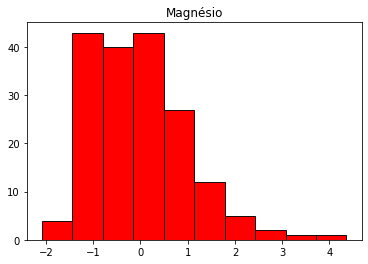

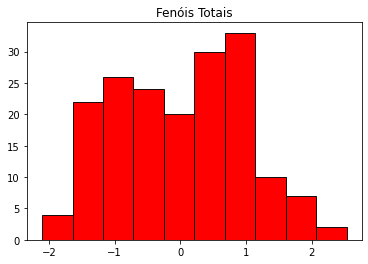

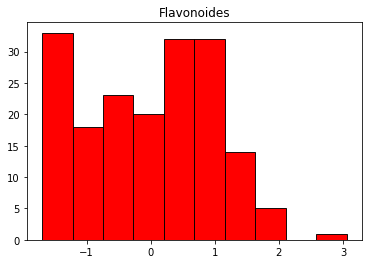

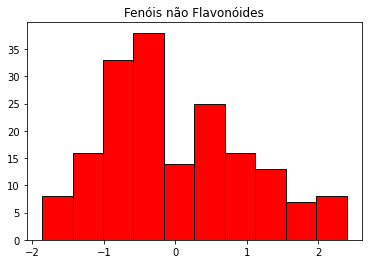

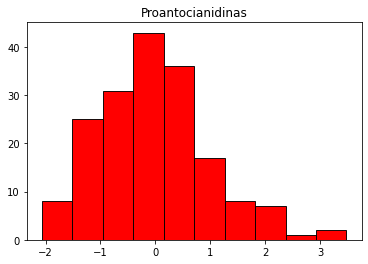

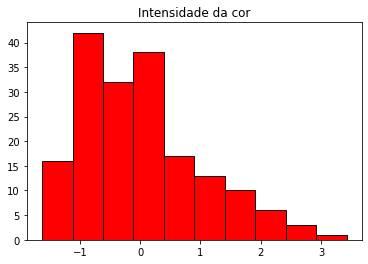

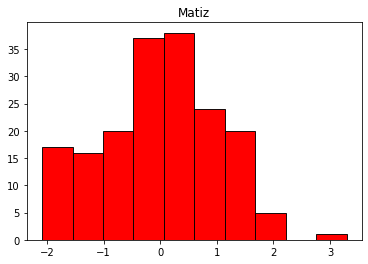

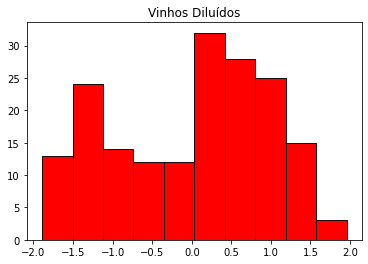

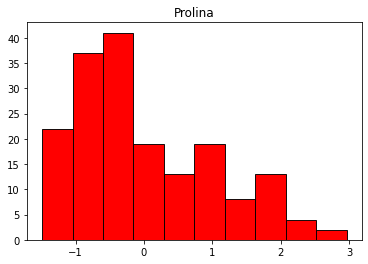

In [ ]:
for atributo in df_dataset.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Agora, pode-se usar um gráfico de densidade para fazer o mesmo tipo de análise.

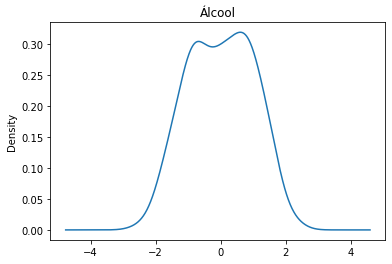

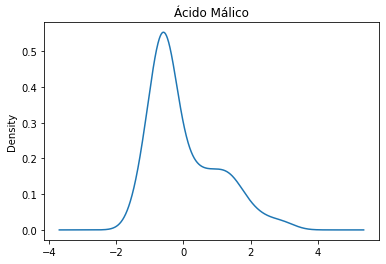

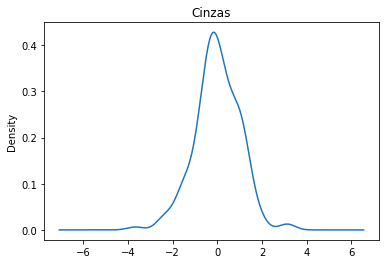

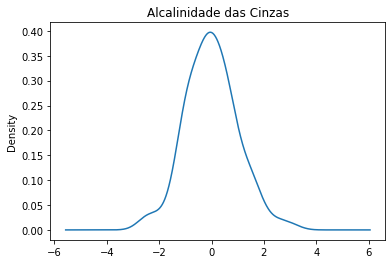

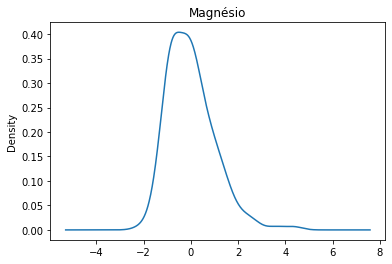

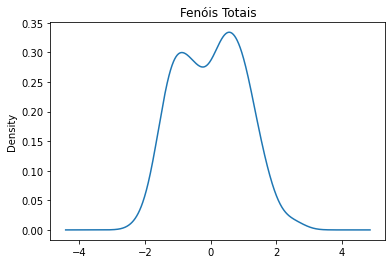

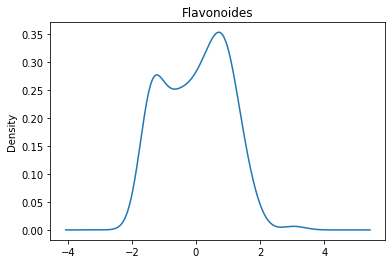

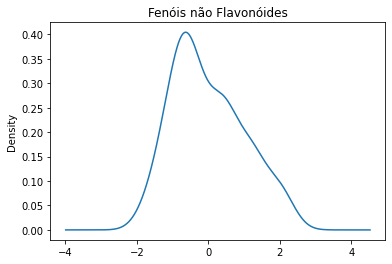

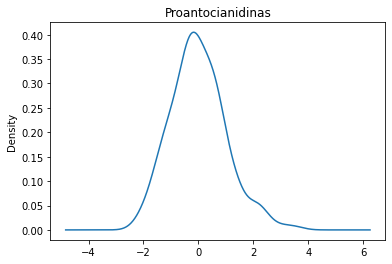

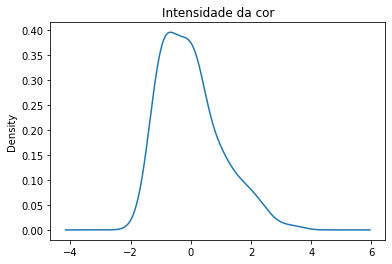

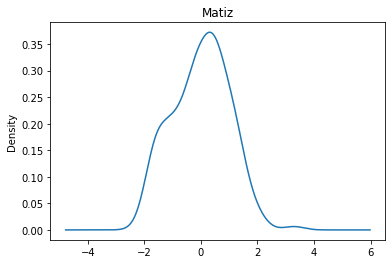

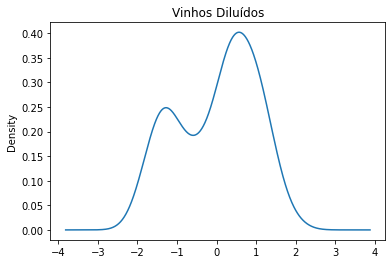

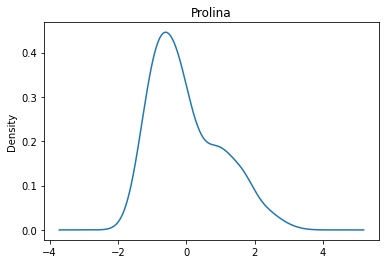

In [ ]:
for atributo in df_dataset.columns[:-1]:

    # criando o gráfico de densidade para cada atributo
    densityplot = df_dataset[atributo].plot(kind='density')
    
    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

Com base nessas informações, vamos usar a função abaixo para remover os *outliers* da base de dados. Usaremos como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

**OBSERVAÇÃO: Para remoção de todos os outliers dessa base de dados foi necessário executar o método 03 VEZES (x03).**

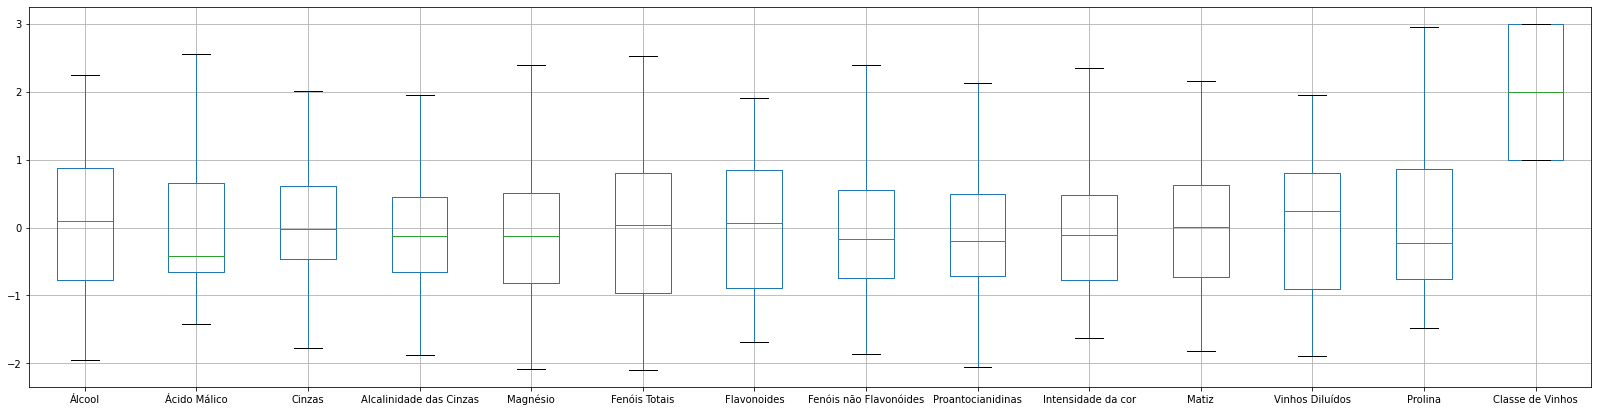

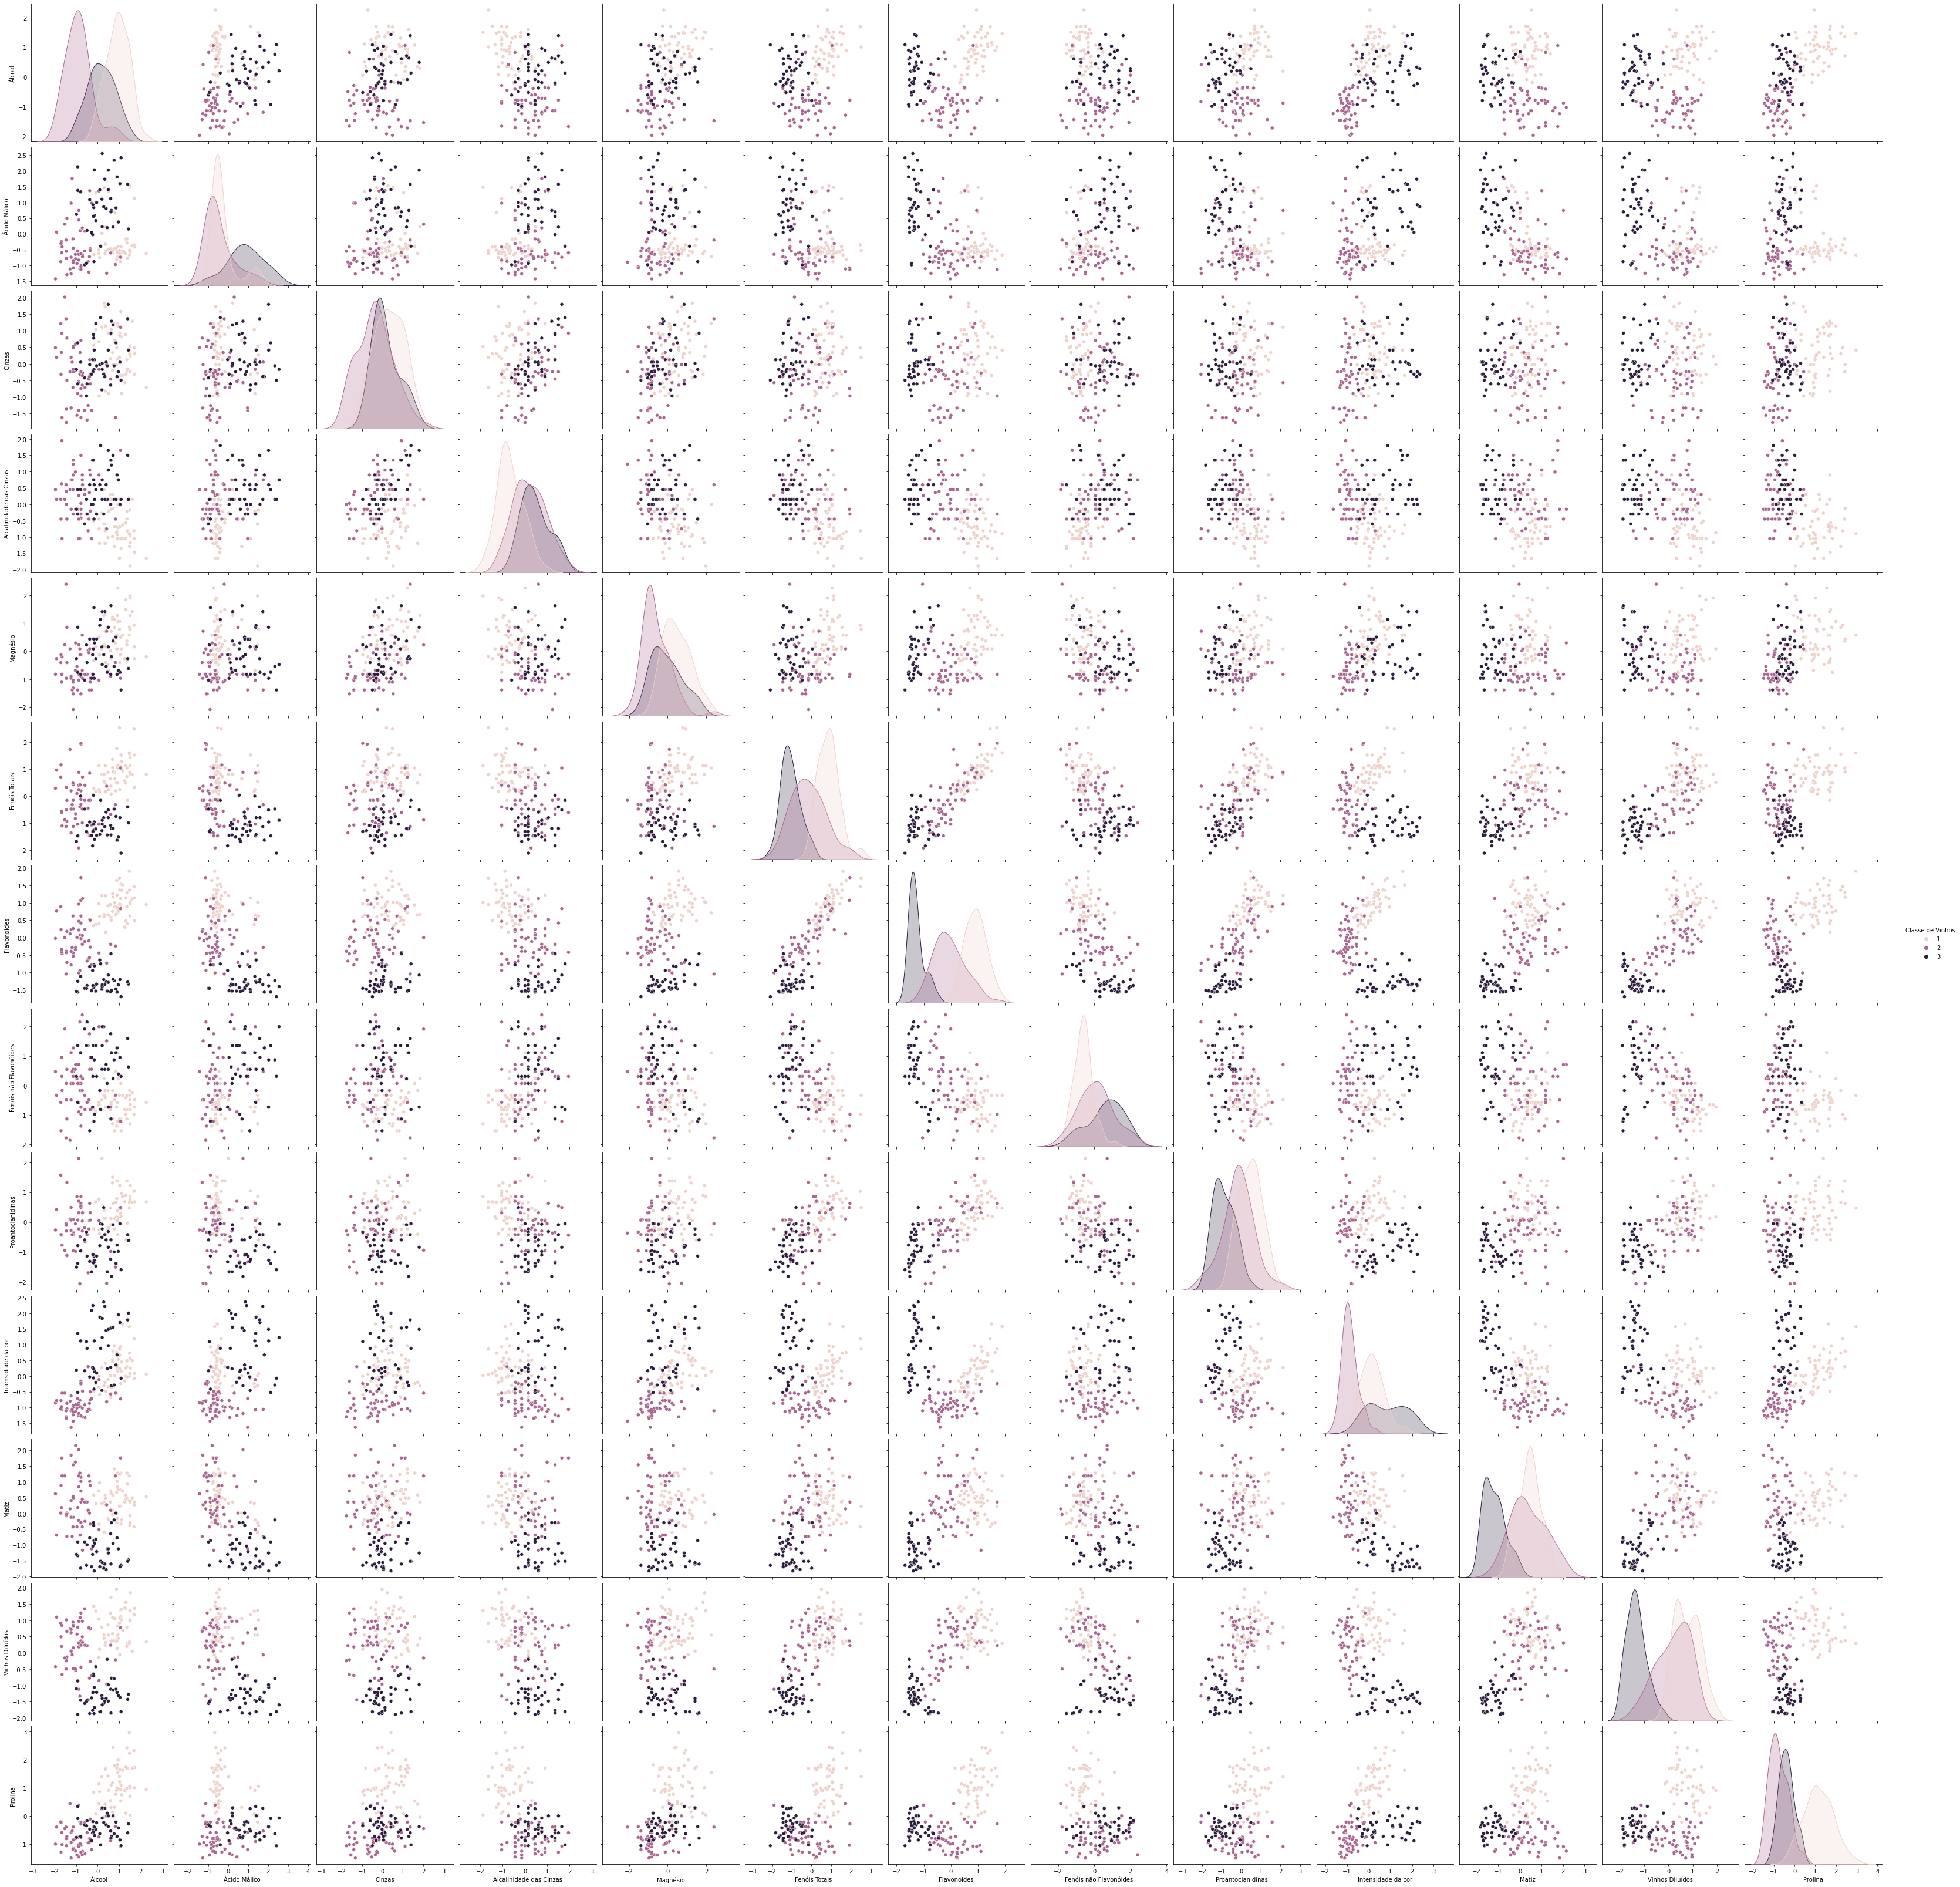

In [ ]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados 
    """
    
    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil. 
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])
        
        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]
    
    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(28,7))
plt.show()

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='Classe de Vinhos', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum *outlier* na base de dados. 


**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras).

## 10- Pré-processamento: distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

2    56
1    54
3    41
Name: Classe de Vinhos, dtype: int64

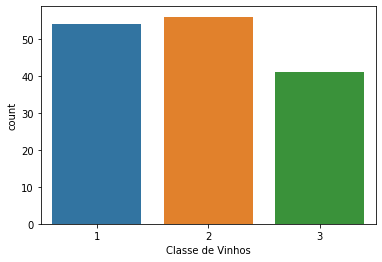

In [ ]:
display( df_dataset['Classe de Vinhos'].value_counts() )

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="Classe de Vinhos", data=df_dataset)

# mostra o gráfico
plt.show()

Pode-se ver que as classes são balanceadas. Se o número de exemplos em alguma das classes fosse muito superior às demais, seria necessário usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioria dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

##11- Pré-processamento: correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Pode-se fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Primeiro, será utilizada a `Numpy`.

In [ ]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('Matriz de covariância: ')
display(covariance)

print('\n\nMatriz de correlação: ')
display(correlation)

Matriz de covariância: 


array([[ 0.95159947,  0.12741332,  0.19820916, -0.25714734,  0.37414702,
         0.32815312,  0.29205202, -0.19112248,  0.18935876,  0.49616476,
        -0.03250112,  0.12939079,  0.64983083],
       [ 0.12741332,  0.86498335,  0.08506599,  0.18413919,  0.00860209,
        -0.35964731, -0.43119702,  0.26690738, -0.22372672,  0.2884471 ,
        -0.51085898, -0.40154869, -0.15959175],
       [ 0.19820916,  0.08506599,  0.67434606,  0.15317718,  0.29552436,
         0.12710744,  0.08975582,  0.0030976 ,  0.05920312,  0.16809791,
         0.03208381,  0.00571601,  0.24876901],
       [-0.25714734,  0.18413919,  0.15317718,  0.64460429, -0.18239179,
        -0.37154175, -0.38179029,  0.23358499, -0.1922668 , -0.03270265,
        -0.20471318, -0.30992461, -0.39862424],
       [ 0.37414702,  0.00860209,  0.29552436, -0.18239179,  0.76667558,
         0.24952687,  0.21522006, -0.24198917,  0.12924371,  0.28319925,
        -0.00329221,  0.04583529,  0.40744414],
       [ 0.32815312, -0.359647



Matriz de correlação: 


array([[ 1.        ,  0.14043775,  0.24743163, -0.32832832,  0.43803556,
         0.33053795,  0.30574882, -0.20207846,  0.22701821,  0.55261345,
        -0.03495459,  0.13139149,  0.65785671],
       [ 0.14043775,  1.        ,  0.11138088,  0.24660152,  0.01056317,
        -0.37996608, -0.47348209,  0.29600024, -0.28133021,  0.33696511,
        -0.57627536, -0.42768626, -0.16945901],
       [ 0.24743163,  0.11138088,  1.        ,  0.23233041,  0.41100401,
         0.15209027,  0.11162279,  0.00389063,  0.08431514,  0.22240448,
         0.04098995,  0.00689513,  0.2991665 ],
       [-0.32832832,  0.24660152,  0.23233041,  1.        , -0.25944952,
        -0.45470833, -0.48563498,  0.30007767, -0.28006582, -0.04425465,
        -0.26750513, -0.38238462, -0.49031502],
       [ 0.43803556,  0.01056317,  0.41100401, -0.25944952,  1.        ,
         0.28001635,  0.25102016, -0.2850529 ,  0.17262592,  0.35140579,
        -0.0039447 ,  0.05185434,  0.45953687],
       [ 0.33053795, -0.379966

Agora, serão calculadas as matrizes de correlação e covariância usando a `Pandas`.

In [ ]:
# matriz de covariancia
df_covariance = df_dataset.cov()

# matriz de correlação
df_correlation = df_dataset.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


Álcool  Ácido Málico    Cinzas  \
Álcool                   0.951599      0.127413  0.198209   
Ácido Málico             0.127413      0.864983  0.085066   
Cinzas                   0.198209      0.085066  0.674346   
Alcalinidade das Cinzas -0.257147      0.184139  0.153177   
Magnésio                 0.374147      0.008602  0.295524   
Fenóis Totais            0.328153     -0.359647  0.127107   
Flavonoides              0.292052     -0.431197  0.089756   
Fenóis não Flavonóides  -0.191122      0.266907  0.003098   
Proantocianidinas        0.189359     -0.223727  0.059203   
Intensidade da cor       0.496165      0.288447  0.168098   
Matiz                   -0.032501     -0.510859  0.032084   
Vinhos Diluídos          0.129391     -0.401549  0.005716   
Prolina                  0.649831     -0.159592  0.248769   
Classe de Vinhos        -0.282077      0.338039 -0.072929   

                         Alcalinidade das Cinzas  Magnésio  Fenóis Totais  \
Álcool                                 -0.257147  0.374147       0.328153   
Ácido Málico                            0.184139  0.008602      -0.359647   
Cinzas                                  0.153177  0.295524       0.127107   
Alcalinidade das Cinzas                 0.644604 -0.182392      -0.371542   
Magnésio                               -0.182392  0.766676       0.249527   
Fenóis Totais                          -0.371542  0.249527       1.035753   
Flavonoides                            -0.381790  0.215220       0.878662   
Fenóis não Flavonóides                  0.233585 -0.241989      -0.494195   
Proantocianidinas                      -0.192267  0.129244       0.559831   
Intensidade da cor                     -0.032703  0.283199      -0.048130   
Matiz                                  -0.204713 -0.003292       0.460781   
Vinhos Diluídos                        -0.309925  0.045835       0.724150   
Prolina                                -0.398624  0.407444       0.545718   
Classe de Vinhos                        0.362805 -0.191392      -0.607410   

                         Flavonoides  Fenóis não Flavonóides  \
Álcool                      0.292052               -0.191122   
Ácido Málico               -0.431197                0.266907   
Cinzas                      0.089756                0.003098   
Alcalinidade das Cinzas    -0.381790                0.233585   
Magnésio                    0.215220               -0.241989   
Fenóis Totais               0.878662               -0.494195   
Flavonoides                 0.958819               -0.563078   
Fenóis não Flavonóides     -0.563078                0.940003   
Proantocianidinas           0.617122               -0.356356   
Intensidade da cor         -0.139581                0.082473   
Matiz                       0.548937               -0.241853   
Vinhos Diluídos             0.775821               -0.504024   
Prolina                     0.543326               -0.336522   
Classe de Vinhos           -0.686390                0.384633   

                         Proantocianidinas  Intensidade da cor     Matiz  \
Álcool                            0.189359            0.496165 -0.032501   
Ácido Málico                     -0.223727            0.288447 -0.510859   
Cinzas                            0.059203            0.168098  0.032084   
Alcalinidade das Cinzas          -0.192267           -0.032703 -0.204713   
Magnésio                          0.129244            0.283199 -0.003292   
Fenóis Totais                     0.559831           -0.048130  0.460781   
Flavonoides                       0.617122           -0.139581  0.548937   
Fenóis não Flavonóides           -0.356356            0.082473 -0.241853   
Proantocianidinas                 0.731131           -0.032849  0.290355   
Intensidade da cor               -0.032849            0.847139 -0.445602   
Matiz                             0.290355           -0.445602  0.908519   
Vinhos Diluídos                   0.519778           -0.375115  0.562419   
Prolin



Matriz de correlação: 


Álcool  Ácido Málico    Cinzas  \
Álcool                   1.000000      0.140438  0.247432   
Ácido Málico             0.140438      1.000000  0.111381   
Cinzas                   0.247432      0.111381  1.000000   
Alcalinidade das Cinzas -0.328328      0.246602  0.232330   
Magnésio                 0.438036      0.010563  0.411004   
Fenóis Totais            0.330538     -0.379966  0.152090   
Flavonoides              0.305749     -0.473482  0.111623   
Fenóis não Flavonóides  -0.202078      0.296000  0.003891   
Proantocianidinas        0.227018     -0.281330  0.084315   
Intensidade da cor       0.552613      0.336965  0.222404   
Matiz                   -0.034955     -0.576275  0.040990   
Vinhos Diluídos          0.131391     -0.427686  0.006895   
Prolina                  0.657857     -0.169459  0.299166   
Classe de Vinhos        -0.365509      0.459431 -0.112257   

                         Alcalinidade das Cinzas  Magnésio  Fenóis Totais  \
Álcool                                 -0.328328  0.438036       0.330538   
Ácido Málico                            0.246602  0.010563      -0.379966   
Cinzas                                  0.232330  0.411004       0.152090   
Alcalinidade das Cinzas                 1.000000 -0.259450      -0.454708   
Magnésio                               -0.259450  1.000000       0.280016   
Fenóis Totais                          -0.454708  0.280016       1.000000   
Flavonoides                            -0.485635  0.251020       0.881709   
Fenóis não Flavonóides                  0.300078 -0.285053      -0.500848   
Proantocianidinas                      -0.280066  0.172626       0.643326   
Intensidade da cor                     -0.044255  0.351406      -0.051382   
Matiz                                  -0.267505 -0.003945       0.475006   
Vinhos Diluídos                        -0.382385  0.051854       0.704841   
Prolina                                -0.490315  0.459537       0.529539   
Classe de Vinhos                        0.571195 -0.276296      -0.754417   

                         Flavonoides  Fenóis não Flavonóides  \
Álcool                      0.305749               -0.202078   
Ácido Málico               -0.473482                0.296000   
Cinzas                      0.111623                0.003891   
Alcalinidade das Cinzas    -0.485635                0.300078   
Magnésio                    0.251020               -0.285053   
Fenóis Totais               0.881709               -0.500848   
Flavonoides                 1.000000               -0.593111   
Fenóis não Flavonóides     -0.593111                1.000000   
Proantocianidinas           0.737064               -0.429855   
Intensidade da cor         -0.154874                0.092421   
Matiz                       0.588148               -0.261709   
Vinhos Diluídos             0.784846               -0.514965   
Prolina                     0.547962               -0.342773   
Classe de Vinhos           -0.886053                0.501463   

                         Proantocianidinas  Intensidade da cor     Matiz  \
Álcool                            0.227018            0.552613 -0.034955   
Ácido Málico                     -0.281330            0.336965 -0.576275   
Cinzas                            0.084315            0.222404  0.040990   
Alcalinidade das Cinzas          -0.280066           -0.044255 -0.267505   
Magnésio                          0.172626            0.351406 -0.003945   
Fenóis Totais                     0.643326           -0.051382  0.475006   
Flavonoides                       0.737064           -0.154874  0.588148   
Fenóis não Flavonóides           -0.429855            0.092421 -0.261709   
Proantocianidinas                 1.000000           -0.041739  0.356258   
Intensidade da cor               -0.041739            1.000000 -0.507928   
Matiz                             0.356258           -0.507928  1.000000   
Vinhos Diluídos                   0.602159           -0.403718  0.584499   
Prolin

Para facilitar a visualização, será plotada a matriz de covariância e a de correlação usando mapas de cores.

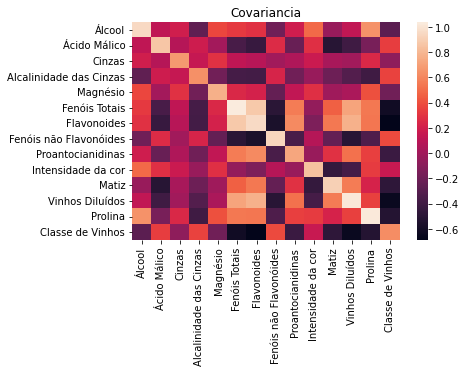

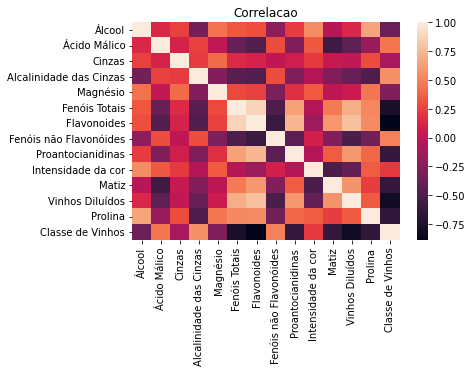

In [ ]:
# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

# 12-Implementação do KNN

**Implementação do KNN considerando os dois primeiros atributos: 'Alcool' e  'Ácido Málico' + matriz de confusao + relatório do algoritmo para saber se está aumentando ou não a precisão a medida que se varia o valor de K - Vide Exemplo KNN com Social dataset - Aula de IA no Moodle**

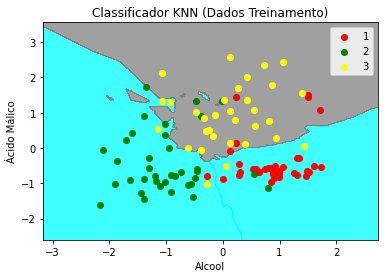

              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.90      0.90      0.90        20
           3       0.70      0.78      0.74         9

    accuracy                           0.85        46
   macro avg       0.82      0.83      0.83        46
weighted avg       0.85      0.85      0.85        46

[[14  0  3]
 [ 2 18  0]
 [ 0  2  7]]


In [ ]:
# Trabalho Original: Algoritmo Vizinhos Mais Próximos (KNN) no Moodle - IA-UFOP

# Algoritmo de Aprendizagem dos Vizinhos Mais Próximos (K-NN)

# Definindo as colunas 1 'Alcool', 2 'Ácido Málico' como atributos descritivos
X = df_dataset.iloc[:, [0, 1]].values
# Definindo a coluna 13 'Classe de Vinhos' como atributo Classe (Preditivo)
y = df_dataset.iloc[:, 13].values

# Separando o conjunto de dados em conjunto de treinamento (70%) e de teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, 
random_state = 0)

# Normalizando os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Gerando o Classificador com os dados de treinamento

classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)

# Realizando a Predição das Classes dos dados do conjunto de teste 
y_pred = classifier.predict(X_test)

# Gerando a Matriz de Confusão com os dados de teste
confmatriz = confusion_matrix(y_test, y_pred)

# Gerando o relatório de Predição de Classe
classreport = classification_report(y_test, y_pred)

# Vizualização dos Resultados sobre o Conjunto de Treinamento
# Uso da biblioteca Matplotlib
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'yellow'))(i), label = j)
plt.title('Classificador KNN (Dados Treinamento)')
plt.xlabel('Alcool')
plt.ylabel('Ácido Málico')
plt.legend()
plt.show()

print(classreport)
print (confmatriz)

   Resultados: Para K = 21 Vizinhos mais próximos:
   
                precision    recall   f1-score   support

           1       0.82      0.82      0.82        17
           2       0.90      0.90      0.90        20
           3       0.67      0.67      0.67         9

Resultados: Para K = 11 Vizinhos mais próximos:

                precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.89      0.90      0.90        20
           3       0.60      0.67      0.67         9



**Resultados:Para K = 7 Vizinhos mais próximos - Para vários casos de testes com diferentes valores de K Vizinhos mais próximos, K = 7 apresentou maior precisão geral de classificação para os dois primeiros atributos da base**

              precision     recall   f1-score    support

           1       0.88      0.82      0.85        17
           2       0.90      0.90      0.90        20
           3       0.70      0.78      0.74         9

Resultados:Para K = 3 Vizinhos mais próximos:

                 precision  recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.85      0.85      0.85        20
           3       0.70      0.78      0.74         9

# **Conclusão**

Foram mostradas as principais etapas de visualização, interpretação e pré-processamento dos dados, verificando dados duplicados, inconsistentes, redundantes e principalmente outliers. Também foi realizada a normalização de dados e análise de forma estatística da média, desvio padrão, máximo, mínimo, etc. Por fim, foi aplicado o Algoritmos de Classificação KNN para classificação de alguns atributos de dados dentro dessa base considerando 'Álcool' e 'Ácido Málico'

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

[2] T. M. Mitchell.Machine Learning. McGraw-Hill, Inc.,New York, NY, USA, 1 edition, 1997.

[3] A. C. P. L. F. de Carvalho, et al. Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina, 2a Edição, Rio de Janeiro, LTC, 2022.

---